In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport


In [2]:
wh=list(np.random.normal(0,10,100));wh.sort()
ww=list(np.random.normal(55,10,100))
cw=[0]*100
mh=list(np.random.normal(28,10,100));mh.sort()
mw=list(np.random.normal(55,10,100))
cm=[1]*100
data=pd.DataFrame([wh+mh,ww+mw,cw+cm]).T
data.columns=["f1","f2","class"]


In [3]:
data.head()

,f1,f2,class
0,-26.575842,63.756211,0.0
1,-23.902641,55.616465,0.0
2,-20.161656,43.771455,0.0
3,-19.944191,51.762991,0.0
4,-19.554814,56.040309,0.0


In [4]:
pip install Pandas_profiling

Note: you may need to restart the kernel to use updated packages.


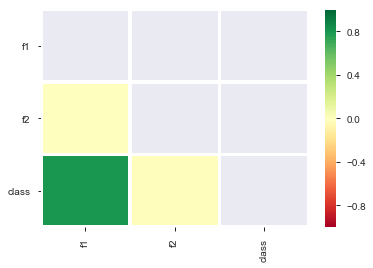

In [5]:
# Testing Multicollinearity 
# Draw a heatmap with correlation using pearson
import seaborn 
corr_x = data.corr(method='pearson')
mask = np.zeros_like(corr_x)
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(corr_x, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(data.iloc[:,1:2],data.iloc[:,2])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
l.coef_

array([[-0.0017699]])

In [8]:
l.intercept_

array([0.0941612])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(data.iloc[:,2],l.predict(data.iloc[:,1:2]))

0.5

In [10]:
accuracy_score(l.predict(data.iloc[:,1:2]),data.iloc[:,2])

0.5

In [11]:
l.fit(data.iloc[:,0:1],data.iloc[:,2])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
l.predict(data.iloc[:,0:1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
accuracy_score(l.predict(data.iloc[:,0:1]),data.iloc[:,2])

0.9

In [14]:
l.fit(data.iloc[:,:2],data.iloc[:,2])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
accuracy_score(l.predict(data.iloc[:,:2]),data.iloc[:,2])

0.915

In [16]:
ProfileReport(data)

In [17]:
x=l.predict_proba(data.iloc[:,0:2])

In [18]:
np.where(x>0.7)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  84,  85,  86,  95,  96,  97,  99, 100,
        104, 109, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199], dtype=i

In [19]:
from sklearn.datasets import load_iris

In [20]:
s=load_iris()

In [21]:
s

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
x=s.data

In [23]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
y=s.target

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
print(s.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [27]:
s.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
x=pd.DataFrame(s.data)

In [29]:
y=pd.DataFrame(s.target)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=95)

In [32]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Documents\\jupyter notebook'

In [33]:
c=LogisticRegression()

In [34]:
c.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
a=c.predict(x_test)

In [36]:
accuracy_score(y_test,a)

0.9

In [37]:
z=s.data

In [38]:
d=pd.DataFrame(z,columns=s.feature_names)

In [39]:
d

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [40]:
b=d.iloc[:,2:4]

In [41]:
f=s.target

In [42]:
f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
j=pd.DataFrame(f,columns=["tarrget"])
j

,tarrget
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [44]:
g=f[:,np.newaxis]

In [45]:
h=print(g)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


In [46]:
b

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [47]:
x_train,x_test,y_train,y_test=train_test_split(b,j,test_size=0.4,random_state=98)

In [48]:
k=LogisticRegression()

In [49]:
k.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
t=k.predict(x_test)
t

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2])

In [51]:
k.intercept_

array([ 3.32067097, -1.47127969, -3.49253348])

In [52]:
k.coef_

array([[-0.99325038, -1.44812952],
       [ 0.48609466, -0.9354258 ],
       [ 0.04162377,  2.15403995]])

In [53]:
metrics.accuracy_score(y_test,t)

0.6833333333333333

In [55]:
i=metrics.classification_report(y_test,t)

In [59]:
i

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       0.83      0.22      0.34        23\n           2       0.49      0.94      0.64        18\n\n   micro avg       0.68      0.68      0.68        60\n   macro avg       0.77      0.72      0.66        60\nweighted avg       0.78      0.68      0.64        60\n'

In [60]:
print(i)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      0.22      0.34        23
           2       0.49      0.94      0.64        18

   micro avg       0.68      0.68      0.68        60
   macro avg       0.77      0.72      0.66        60
weighted avg       0.78      0.68      0.64        60



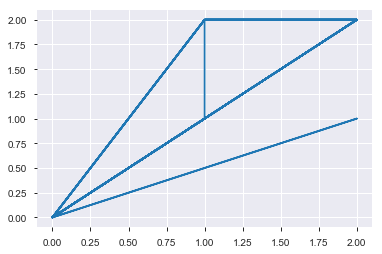

In [61]:
plt.plot(y_test,t)

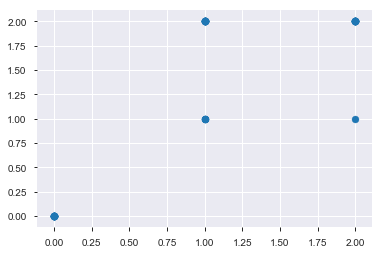

In [62]:
plt.scatter(y_test,t)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(b,j,test_size=0.2,random_state=98)

In [64]:
k=LogisticRegression()

In [65]:
k.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [68]:
ovr=OneVsRestClassifier(LogisticRegression()).fit(x_train,y_train)
ovr

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [70]:
ovo=OneVsOneClassifier(LogisticRegression()).fit(x_train,y_train)
ovo

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [71]:
ovr.coef_

array([[-1.08820924, -1.54507275],
       [ 0.59435569, -1.15526458],
       [ 0.07563515,  2.33491396]])

In [72]:
ovr.intercept_

array([[ 3.72014176],
       [-1.71169767],
       [-3.87585991]])

In [74]:
ovo.intercept__

AttributeError: 'OneVsOneClassifier' object has no attribute 'intercept__'

In [75]:
metrics.accuracy_score(y_test,ovr.predict(x_test))

0.5

In [76]:
metrics.accuracy_score(y_test,ovo.predict(x_test))

0.8

In [95]:
pi=np.random.uniform(0,6.14,100)
le=np.random.uniform(0,2,100)
x1=list(le*np.cos(pi))
y1=list(le*np.sin(pi))
c1=[1]*100

pi=np.random.uniform(0,6.14,100)
le=np.random.uniform(4,6,100)
x2=list(le*np.cos(pi))
y2=list(le*np.sin(pi))
c2=[2]*100

pi=np.random.uniform(0,6.14,100)
le=np.random.uniform(8,10,100)
x3=list(le*np.cos(pi))
y3=list(le*np.sin(pi))
c3=[3]*100

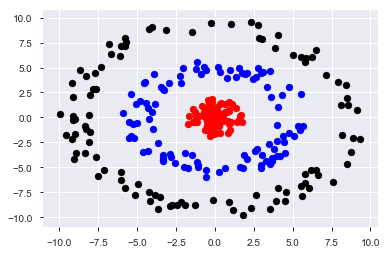

In [83]:
plt.scatter(x1,y1,color='red',alpha=1)
plt.scatter(x2,y2,color='blue',alpha=1)
plt.scatter(x3,y3,color='black',alpha=1)

In [84]:
l=LogisticRegression()

In [96]:
p=pd.DataFrame(x1+x2+x3,y1+y2+y3,c1+c2+c3,columns=['f1','f2',"class"])

TypeError: __init__() got multiple values for argument 'columns'

In [88]:
p

,0
-0.508140,-1.205268
0.052681,0.518924
-0.468593,0.001948
0.041871,-0.631863
0.216891,-0.626345
1.380336,-0.359919
0.560357,0.670104
-0.515941,0.275736
0.892074,-1.413239
-0.000006,-0.003053


In [108]:
p=pd.DataFrame(columns=['f1','f2','cla'])

In [113]:
p.f1=x1+x2+x3
p.f2=y1+y2+y3
p['cla']=c1+c2+c3

In [114]:
p

,f1,f2,cla
0,0.329280,-1.353826,1
1,-1.247481,-0.831320,1
2,1.049989,0.894117,1
3,-0.721401,-0.076097,1
4,0.622269,-0.199311,1
5,-1.779155,-0.060083,1
6,0.350423,0.696666,1
7,1.413414,0.307823,1
8,-0.684365,1.111359,1
9,-1.462853,1.257911,1


In [110]:
p.f1

Series([], Name: f1, dtype: object)

In [111]:
m=pd.DataFrame(p.f1,p.f2)

In [112]:
m

,f1
f2,


In [116]:
ovo=OneVsOneClassifier(LogisticRegression()).fit(p.iloc[:,0:2],p.iloc[:,-1])

In [120]:
metrics.accuracy_score(ovo.predict(p.iloc[:,:2]),p.iloc[:,-1])

0.39

In [125]:
sns.load_dataset('diabetes.csv')

HTTPError: HTTP Error 404: Not Found